In [1]:
# =============================================
# Module 4 - Time Series & Forecasting
# Project 2: Time Series Decomposition & Trend Analysis
# =============================================

# Author: Rein | Pixel Sky Solutions
# Course: Python–Finance Master Plan
# ---------------------------------------------
# In this notebook we explore trend, seasonality,
# and randomness within a time series using
# decomposition and autocorrelation tools.
# ---------------------------------------------

In [24]:
# =============================================
# 📘 Executive Summary
# =============================================
# """
# This project explores the internal structure of a financial time series by separating its 
# trend, seasonality, and randomness components. Using synthetic data that mimics real-world 
# market behavior, we perform a full decomposition and stationarity analysis.

# Key goals:
# - Understand how trend and seasonality impact long-term price movement.
# - Apply statistical tests (ADF) to assess stationarity.
# - Visualize autocorrelation patterns for model selection (ARIMA readiness).

# This module bridges the gap between descriptive time-series analysis and forecasting 
# models, preparing us for ARIMA & GARCH implementation in the next project.
# """

In [2]:
# 📦 Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [4]:
# ===============================
# 1️⃣ Generate Synthetic Time Series
# ===============================

In [5]:
# 🔎 Explanation:
# We simulate a stock index with a slow upward trend,
# a seasonal (monthly) pattern, and random noise.

In [6]:
np.random.seed(42)
n_days = 730   # ~2 years
time = np.arange(n_days)

In [7]:
trend = 0.05 * np.sin(time / 365 * 2 * np.pi) + 0.001 * time  # yearly cycle + slow drift
seasonal = 0.02 * np.sin(time / 30 * 2 * np.pi)               # monthly seasonality
noise = np.random.normal(0, 0.02, n_days)

In [8]:
series = 100 + trend + seasonal + noise

In [9]:
# Put into DataFrame
df = pd.DataFrame({
    "Date": pd.date_range("2022-01-01", periods=n_days),
    "Value": series
}).set_index("Date")

C:\Users\moonw\AppData\Local\Temp\ipykernel_38404\1508777765.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\moonw\AppData\Local\Temp\ipykernel_38404\1508777765.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.savefig("charts/project2_timeseries_overview.png")


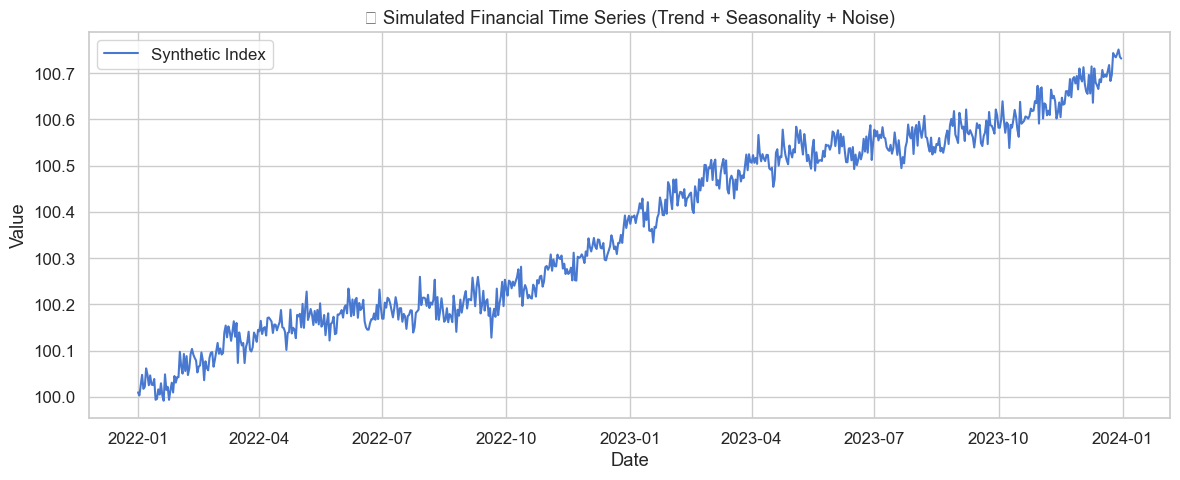

In [11]:
# Plot
plt.figure(figsize=(12,5))
plt.plot(df["Value"], label="Synthetic Index")
plt.title("📊 Simulated Financial Time Series (Trend + Seasonality + Noise)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.savefig("charts/project2_timeseries_overview.png")
plt.show()

In [12]:
# ===============================
# 2️⃣ Decompose the Time Series
# ===============================

In [13]:
# Seasonal decomposition (additive model)
decomposition = seasonal_decompose(df["Value"], model="additive", period=30)

C:\Users\moonw\AppData\Local\Temp\ipykernel_38404\1194411826.py:8: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\moonw\AppData\Local\Temp\ipykernel_38404\1194411826.py:9: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.savefig("charts/project2_decomposition.png")
C:\Users\moonw\OneDrive\Desktop\PYTHON\FINANCIAL_ANALYTICS\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


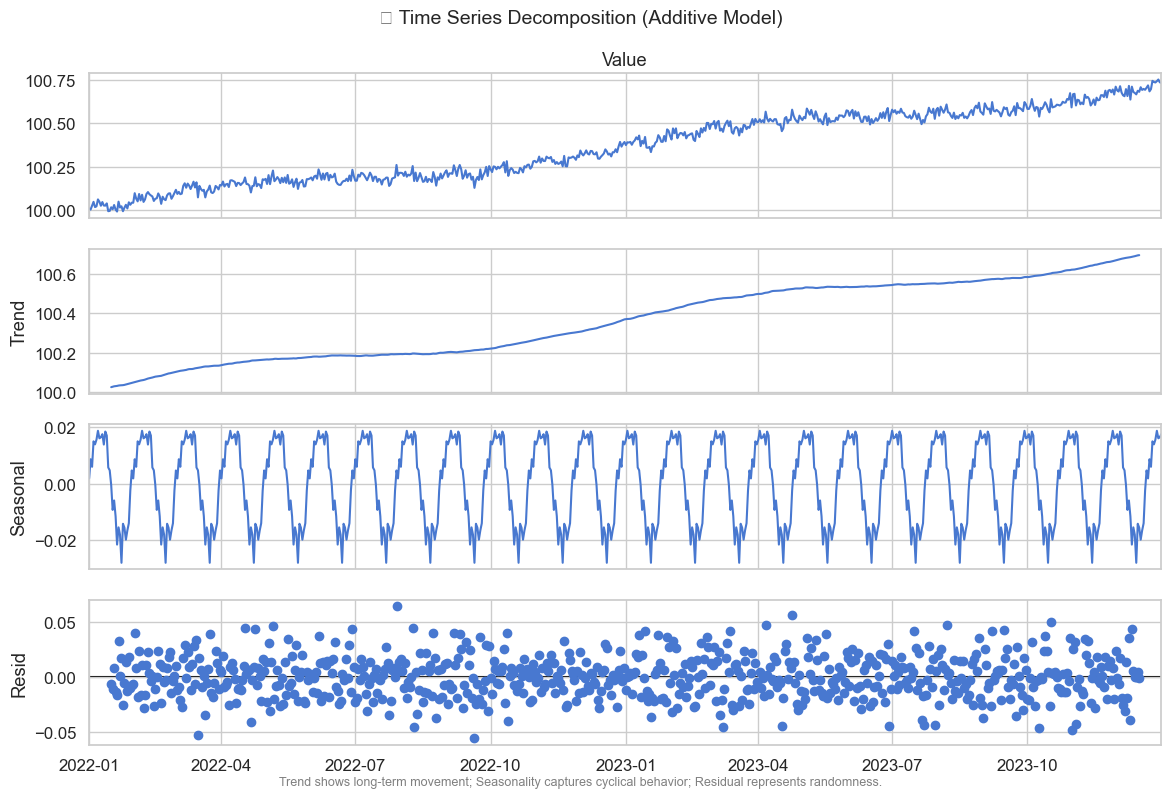

In [32]:
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle("📉 Time Series Decomposition (Additive Model)", fontsize=14)
plt.subplots_adjust(top=0.93)
plt.figtext(0.5, 0.01,
    "Trend shows long-term movement; Seasonality captures cyclical behavior; Residual represents randomness.",
    ha='center', fontsize=9, color='gray')
plt.tight_layout()
plt.savefig("charts/project2_decomposition.png")
plt.show()

In [16]:
# ===============================
# 3️⃣ Stationarity Test (ADF)
# ===============================

In [17]:
# 🔎 Explanation:
# A stationary series has constant mean & variance over time.
# Many forecasting models (like ARIMA) require stationarity.

In [18]:
result = adfuller(df["Value"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, val in result[4].items():
    print(f"Critical Value ({key}): {val:.3f}")

if result[1] < 0.05:
    print("✅ Series is likely stationary.")
else:
    print("⚠️ Series is non-stationary (has trend/seasonality).")

ADF Statistic: -0.18439556765822088
p-value: 0.9403562437635168
Critical Value (1%): -3.440
Critical Value (5%): -2.866
Critical Value (10%): -2.569
⚠️ Series is non-stationary (has trend/seasonality).


In [25]:
# Store and Display ADF Results as a Table

# This makes it visually clearer and exportable for reports:

In [26]:
# ADF Results Table
adf_result = pd.Series(result[0:4], index=['ADF Statistic', 'p-value', '# Lags Used', '# Observations'])
for key, val in result[4].items():
    adf_result[f'Critical Value ({key})'] = val
display(adf_result.to_frame("ADF Test Result"))

,ADF Test Result
ADF Statistic,-0.184396
p-value,0.940356
# Lags Used,20.000000
# Observations,709.000000
Critical Value (1%),-3.439607
Critical Value (5%),-2.865625
Critical Value (10%),-2.568945


In [33]:
# Rolling Mean/Std Visualization (Optional)

# Helps visually confirm non-stationarity before differencing.

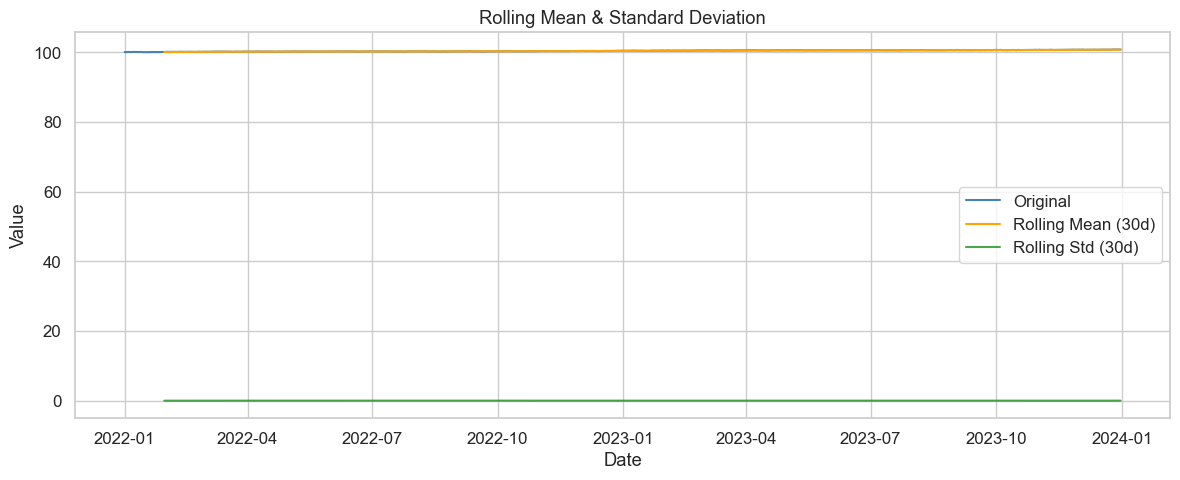

In [34]:
# Rolling Mean and Standard Deviation
rolling_mean = df["Value"].rolling(window=30).mean()
rolling_std = df["Value"].rolling(window=30).std()

plt.figure(figsize=(12,5))
plt.plot(df["Value"], label="Original", color="steelblue")
plt.plot(rolling_mean, label="Rolling Mean (30d)", color="orange")
plt.plot(rolling_std, label="Rolling Std (30d)", color="green", alpha=0.7)
plt.title("Rolling Mean & Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.savefig("charts/project2_rolling_stats.png")
plt.show()

In [19]:
# ===============================
# 4️⃣ Autocorrelation & Partial Autocorrelation
# ===============================

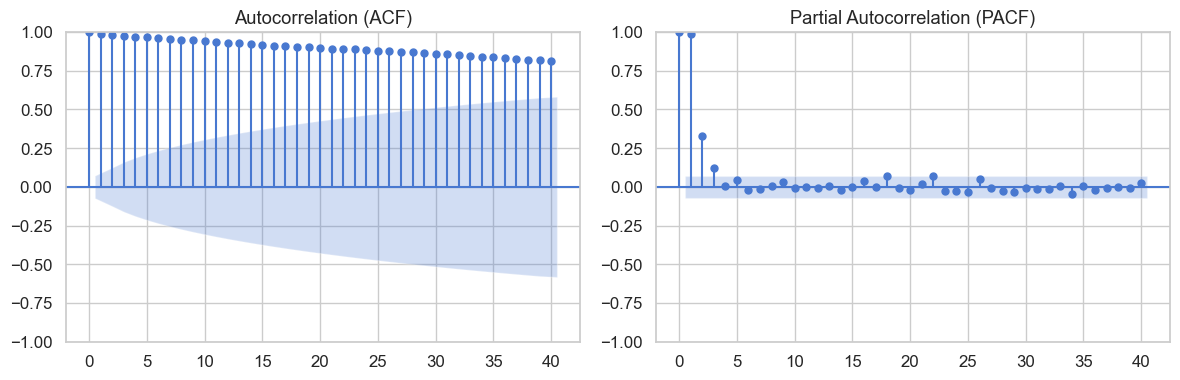

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plot_acf(df["Value"], ax=axes[0], lags=40)
plot_pacf(df["Value"], ax=axes[1], lags=40, method='ywm')
axes[0].set_title("Autocorrelation (ACF)")
axes[1].set_title("Partial Autocorrelation (PACF)")
plt.tight_layout()
plt.savefig("charts/project2_acf_pacf.png")
plt.show()

In [35]:
# ===============================
# ✅ Wrap-Up
# ===============================

In [23]:
# 🔑 Key Takeaways:
# - A time series can be decomposed into trend, seasonal, and residual components.
# - Visual inspection helps understand underlying drivers of movement.
# - ADF test checks stationarity, an essential step before forecasting.
# - ACF and PACF plots help identify correlation structure across time lags.

print("✅ Project 2 Complete: Charts saved to PHASE1/MODULE-4/charts/")

✅ Project 2 Complete: Charts saved to PHASE1/MODULE-4/charts/


In [36]:
# ===============================
# 🧠 Analytical Commentary
# ===============================
if result[1] < 0.05:
    summary = "The series is stationary, indicating no significant long-term trend or seasonal component."
else:
    summary = "The series is non-stationary, suggesting presence of trend and/or seasonality, consistent with decomposition results."

print("📊 Summary:")
print(f"- ADF p-value: {result[1]:.4f}")
print(f"- Conclusion: {summary}")
print("- ACF/PACF plots show autocorrelation structure, guiding ARIMA parameter selection in the next project.")

📊 Summary:
- ADF p-value: 0.9404
- Conclusion: The series is non-stationary, suggesting presence of trend and/or seasonality, consistent with decomposition results.
- ACF/PACF plots show autocorrelation structure, guiding ARIMA parameter selection in the next project.
